In [20]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
df = pd.read_csv("Creditcard_data.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [23]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


<Axes: xlabel='Class', ylabel='count'>

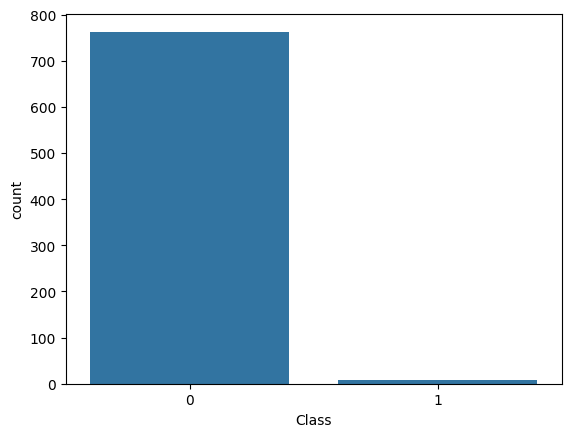

In [24]:
sns.countplot(data= df, x= 'Class')

In [25]:
df['Class'].value_counts()

0    763
1      9
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

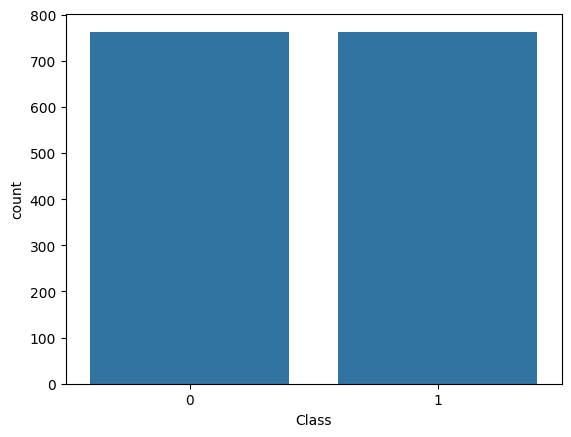

In [26]:
X= df.drop('Class',axis=1)
y= df['Class']

ros= RandomOverSampler(random_state=42)

X_resampled, y_resampled= ros.fit_resample(X,y)

resampled_df= pd.concat([pd.DataFrame(X_resampled,columns= X.columns), pd.Series(y_resampled,name= 'Class')], axis=1)

sns.countplot(data= resampled_df, x= 'Class')

In [27]:
resampled_df['Class'].value_counts()

0    763
1    763
Name: Class, dtype: int64

In [28]:
z= 1.96
p= 0.5
E= 0.05
sample_size= int(np.round((z**2 * p * (1-p)) / (E**2)))
sample_size

384

In [29]:
random_sample= resampled_df.sample(n= sample_size, replace= False).reset_index(drop= True)
random_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,235,-0.663511,-0.044443,1.029253,-2.498072,-1.350085,-0.798774,-0.581071,0.480997,-2.517037,...,-0.051895,0.070846,0.039321,0.275750,-0.330251,-0.423936,0.251989,0.133957,25.00,0
1,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
2,204,0.860652,-0.247375,0.754082,1.185492,-0.486174,0.241013,-0.197776,0.136015,-0.138920,...,0.285398,0.612468,-0.175761,0.047503,0.378592,-0.305092,0.037626,0.043644,137.30,0
3,513,1.255258,0.075190,0.225733,0.881766,0.154508,0.631960,-0.385968,0.189493,0.447980,...,0.088457,0.321206,-0.235167,-1.325033,0.643129,-0.133690,0.053069,0.012484,7.00,0
4,56,0.086996,-0.051989,-0.497882,-3.151908,2.558400,2.796671,0.470283,0.265333,0.919513,...,-0.239426,-0.437342,0.018426,1.013038,-0.258927,-0.293189,-0.394956,-0.435996,10.84,0


In [30]:
sample_size= len(resampled_df)//5
k=5
indices= np.arange(0,len(resampled_df),k)[:sample_size]
systematic_sample= resampled_df.loc[indices].reset_index(drop= True)
systematic_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
3,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0
4,16,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0


In [31]:
z= 1.96
p= 0.7
E= 0.01
S= 2

In [32]:
sample_size= int(np.round((z**2 * p * (1-p)) / (E/S)**2))
sample_size

32269

In [33]:
stratified_sample= resampled_df.groupby(by= 'Class', group_keys= False).apply(lambda x: x.sample(n= sample_size//2, replace= True)).reset_index(drop= True)
stratified_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,414,-0.376162,0.460565,1.686273,1.300379,0.192393,0.205985,0.554367,0.095977,-0.210761,...,0.030858,0.301532,-0.072867,0.178562,-0.344148,-0.301681,-0.000071,-0.083202,29.99,0
1,287,1.030072,-0.295088,-0.109924,0.071540,-0.318253,-0.912976,0.431930,-0.302891,-0.044433,...,-0.458490,-1.726680,0.087429,-0.108541,-0.023411,0.525921,-0.120269,0.031205,160.00,0
2,561,-0.711797,-0.983416,2.042490,-2.348505,-1.670333,-0.407697,-0.243285,0.098952,-2.324725,...,0.230367,0.659188,0.153339,0.486741,-0.021313,-0.232520,0.060912,0.115507,149.90,0
3,92,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,...,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
4,510,1.163271,0.141760,0.124579,0.958551,-0.159554,-0.461529,0.090759,-0.023257,-0.125187,...,0.066320,0.089322,-0.169921,-0.012282,0.660756,-0.325616,-0.002210,0.010419,35.93,0


In [34]:
train_stratified_sample, test_stratified_sample= train_test_split(resampled_df, test_size= 0.3, stratify= resampled_df['Class'])

In [35]:
train_stratified_sample= train_stratified_sample.reset_index(drop= True)
test_stratified_sample= test_stratified_sample.reset_index(drop= True)

In [36]:
train_stratified_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
2,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
3,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
4,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,184,1.199278,0.365738,0.428155,0.617733,-0.342610,-0.845869,0.041919,-0.114617,-0.360600,...,-0.213355,-0.615517,0.132391,0.517045,0.185487,0.061686,-0.021504,0.024434,1.98,0
1064,188,1.168433,0.319978,0.589693,1.044774,-0.376942,-0.677335,0.054472,-0.087670,-0.304110,...,0.020051,0.066970,-0.017274,0.532429,0.502070,-0.470804,0.021893,0.019337,8.09,0
1065,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
1066,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1


In [37]:
test_stratified_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,79,-2.374380,0.597145,0.036656,-1.406989,0.299692,-0.341103,0.624572,0.369832,0.344458,...,-0.423323,-0.527400,0.162980,-0.894113,-0.087018,0.718174,-0.011363,-0.431914,80.00,0
1,42,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,-0.479813,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,243.66,0
2,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
3,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
4,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
454,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
455,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
456,22,-1.946525,-0.044901,-0.405570,-1.013057,2.941968,2.955053,-0.063063,0.855546,0.049967,...,-0.579526,-0.799229,0.870300,0.983421,0.321201,0.149650,0.707519,0.014600,0.89,0


In [38]:
X_test= test_stratified_sample.drop('Class',axis=1)
y_test= test_stratified_sample['Class']

In [39]:
z= 1.96
p= 0.5
E= 0.05
C= 50

In [40]:
sample_size= int(np.round((z**2 * p * (1-p)) / (E/C)**2))
sample_size

960400

In [41]:
clusters= [0,1]
sample_size= 500
cluster_sample= pd.DataFrame()

for cluster in clusters:
    cluster_df= resampled_df[resampled_df['Class']==cluster]
    sample= cluster_df.sample(n= sample_size)
    cluster_sample= pd.concat([cluster_sample,sample])

In [42]:
cluster_sample= cluster_sample.reset_index(drop= True)

In [43]:
cluster_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,530,1.445729,-0.992653,0.702959,-1.311315,-1.613625,-0.726591,-1.045431,-0.079224,-1.812438,...,-0.409740,-0.819422,0.287770,0.322668,-0.007635,-0.469269,0.050763,0.027198,12.00,0
1,426,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,...,5.273420,-1.681997,0.526025,-1.207179,-0.017369,0.376704,0.139676,-0.164094,16.19,0
2,251,1.206638,0.143345,-0.131756,0.902486,0.219547,-0.028155,0.099295,0.002020,0.166709,...,0.006414,-0.000173,-0.186810,-0.777284,0.686915,-0.246620,0.018176,0.011324,31.80,0
3,241,-1.142321,0.626405,2.526917,2.827973,0.619263,0.897473,0.536278,-0.060163,-0.813749,...,-0.309746,-0.269173,0.177396,-0.019578,0.048651,0.068831,-0.246503,-0.230837,10.62,0
4,511,-0.556245,0.657574,2.706193,2.792656,0.208496,0.908663,0.074210,0.065530,-0.757281,...,0.105614,0.489549,-0.328685,-0.427097,0.207280,0.413055,-0.058339,-0.125352,37.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
996,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
997,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
998,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1


In [44]:
num_bootstrap_samples = 1

for _ in range(num_bootstrap_samples):
    bootstrap_sample = resampled_df.sample(n=len(resampled_df), replace=True)

In [45]:
bootstrap_sample= bootstrap_sample.reset_index(drop= True)

In [46]:
bootstrap_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
1,509,1.166592,0.124033,0.381999,1.403556,-0.254473,-0.209577,-0.016417,0.054510,0.475647,...,-0.116682,-0.155497,-0.046085,0.061416,0.622487,-0.308575,0.032173,0.013178,6.99,0
2,561,-0.711797,-0.983416,2.042490,-2.348505,-1.670333,-0.407697,-0.243285,0.098952,-2.324725,...,0.230367,0.659188,0.153339,0.486741,-0.021313,-0.232520,0.060912,0.115507,149.90,0
3,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
4,571,-2.355336,2.316182,0.701735,0.174501,0.677346,1.029705,0.792868,-0.060581,1.296525,...,0.008872,0.955806,0.047292,-0.650140,-0.282282,-0.286391,0.335493,0.223061,2.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1522,260,1.455906,-0.928378,0.353459,-1.377867,-1.233133,-0.600292,-0.817626,-0.185507,-2.053665,...,-0.306224,-0.468314,0.119445,0.052555,0.255276,-0.313338,0.044343,0.022091,26.50,0
1523,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
1524,336,-0.895224,0.562106,2.817524,-0.718734,0.223222,0.796156,0.464887,-0.002081,0.387537,...,-0.117009,0.221249,-0.380422,-0.245721,0.202958,0.320802,-0.174340,-0.331954,7.72,0


In [47]:
lr_model= LogisticRegression(max_iter= 10000, solver= 'sag')
knn_model= KNeighborsClassifier(n_neighbors= 3)
rf_model= RandomForestClassifier()
sv_model= SVC(random_state=42)
xg_model= XGBClassifier(random_state=42)

In [48]:
models= [lr_model,knn_model,rf_model,sv_model,xg_model]
model_names= ['Logistic Regression','KNN','Random Forest Classifier','SVM','XGBOOST Claasifier']

In [49]:
samples= [random_sample, systematic_sample, train_stratified_sample, cluster_sample, bootstrap_sample]
sample_names= ['Simple Random Sample', 'Systematic Sample', 'Stratified Sample', 'Cluster Sample', 'Bootstrap Sample']

In [50]:
test_samples= []

In [51]:
for sample in samples:
    scaler= StandardScaler()
    X_train= scaler.fit_transform(sample.drop('Class',axis=1))
    X_train= pd.DataFrame(X_train, columns= df.columns[:-1])
    sample= pd.concat([X_train,sample['Class']],axis=1)
    X_test= scaler.fit_transform(X_test)
    X_test= pd.DataFrame(X_test, columns= df.columns[:-1])
    test_samples.append(X_test)

In [52]:
accuracy_table= pd.DataFrame(index= model_names, columns= sample_names)

for i,model in enumerate(models):
    for j,sample in enumerate(samples):
        model.fit(sample.drop('Class',axis=1), sample['Class'])
        pred= model.predict(test_samples[j])
        accuracy_table.loc[model_names[i], sample_names[j]]= accuracy_score(y_test, pred)

In [53]:
accuracy_table

,Simple Random Sample,Systematic Sample,Stratified Sample,Cluster Sample,Bootstrap Sample
Logistic Regression,0.672489,0.663755,0.661572,0.762009,0.663755
KNN,0.5,0.5,0.504367,0.5,0.425764
Random Forest Classifier,0.5,0.565502,0.5,0.5,0.5
SVM,0.5,0.5,0.5,0.5,0.5
XGBOOST Claasifier,0.600437,0.60262,0.652838,0.655022,0.613537
